In [3]:
import os
import os.path as osp

import sys
sys.path.append("..")

import core

background class: DontCare:0


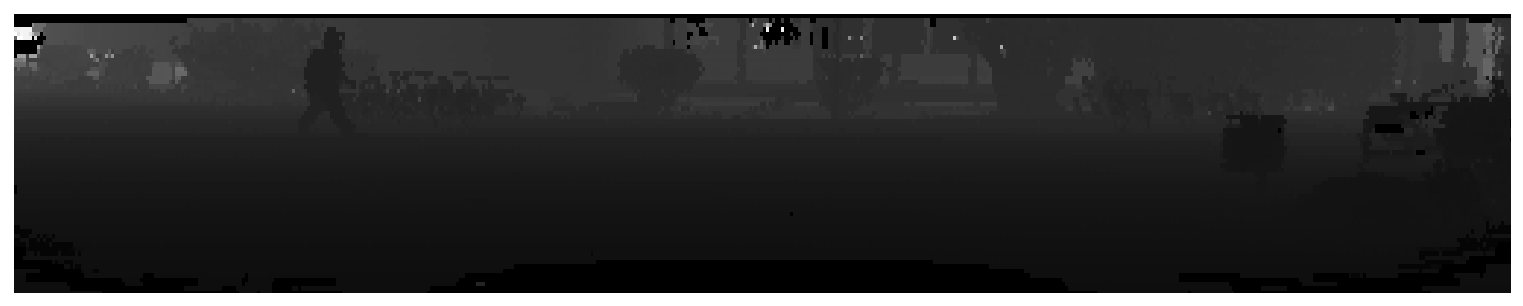

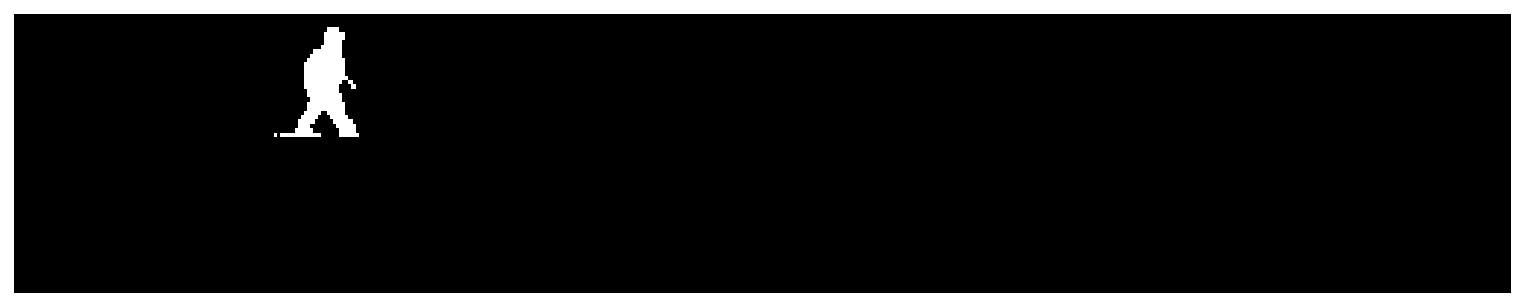

In [8]:
import sys
sys.path.append("..")

import torch
import torch.utils.data
import numpy as np

import matplotlib.pyplot as plt

import core

conf_dataset = core.readconfyaml.read("../conf/data.yaml")
train_dataset = core.dataset.KITTISpherical(
    "../data", "train", conf_dataset
)
train_loader = torch.utils.data.DataLoader(
    dataset=train_dataset,
    batch_size=conf_dataset.batch_size,
    shuffle=True,
    num_workers=4
)

print(f"background class: {conf_dataset.bg_clsname}:{train_dataset.cls2ldx[conf_dataset.bg_clsname]}")


def show_spherical_proj(img: np.ndarray):
    plt.figure(figsize=(12, 6), dpi=128, tight_layout=True)
    plt.axis([512, 0, 0, 64])
    plt.axis("off")
    plt.imshow(img, cmap="gray", aspect=1.5, interpolation='nearest')
for iter, (fmap, gdth) in enumerate(train_loader):

    show_spherical_proj(fmap[0][3])
    show_spherical_proj(gdth[0])

    break

In [5]:
import torch
import torch.nn as nn

# 假设输入特征图的形状为 (batch_size, channels, 4, 64)
batch_size = 1  # 假设 batch_size 为 1
channels = 3    # 假设输入通道数为 3
input_height = 4
input_width = 4

# 创建输入特征图
input_tensor = torch.randn(batch_size, channels, input_height, input_width)

# 定义转置卷积层
# 输入通道数为 channels，输出通道数为 out_channels
out_channels = 1  # 输出通道数可以根据需要调整
transpose_conv = nn.ConvTranspose2d(
    in_channels=channels,
    out_channels=out_channels,
    kernel_size=4,
    stride=2,
    padding=0
)
# out = (n - 1) * stride - 2 * padding + kernel_size

# 执行转置卷积
output_tensor = transpose_conv(input_tensor)

# 输出结果的形状
print("输出特征图的形状:", output_tensor.shape)

输出特征图的形状: torch.Size([1, 1, 10, 10])


In [6]:
from datetime import datetime

# 假设有一个特定的时间对象
specific_time = datetime(2023, 10, 5, 14, 30, 45)

# 格式化时间字符串
formatted_time = specific_time.strftime("%Y%m%d%H%M%S")

print(formatted_time)

20231005143045


In [62]:
import torch

num_samples = 5
num_channel = 3

pred = torch.rand((num_samples, num_channel, 4, 4))
gdth = torch.randint(0, num_channel, (num_samples, 4, 4))

mask = (gdth == 0)
print("mask:", mask.shape)
pred = torch.argmax(pred, dim=1)
print("pred:", pred.shape)
accu = (pred == gdth).float()
print("accu:", accu.shape)

accu[mask] = 0
print("valid position:", mask.sum().item())
print("correct pixel:", accu.sum().item())
print(accu.mean())

mask: torch.Size([5, 4, 4])
pred: torch.Size([5, 4, 4])
accu: torch.Size([5, 4, 4])
valid position: 31
correct pixel: 19.0
tensor(0.2375)


In [29]:
print("\n1d data")
data = torch.rand((3))
print(data)
print(torch.argmax(data, dim=0))

print("\n2d data")
data = torch.rand((3, 3))
print(data)
print(torch.argmax(data, dim=0))

print("\n3d data")
data = torch.rand((3, 3, 3))
print(data)
print(torch.argmax(data, dim=0))


1d data
tensor([0.6403, 0.0818, 0.5415])
tensor(0)

2d data
tensor([[0.9280, 0.9709, 0.7435],
        [0.5363, 0.2232, 0.3948],
        [0.2669, 0.8329, 0.3588]])
tensor([0, 0, 0])

3d data
tensor([[[0.4466, 0.9123, 0.1857],
         [0.5757, 0.4012, 0.4985],
         [0.3785, 0.3868, 0.5997]],

        [[0.1064, 0.7722, 0.6799],
         [0.7344, 0.9423, 0.9400],
         [0.4237, 0.8418, 0.4642]],

        [[0.9217, 0.7884, 0.7682],
         [0.3518, 0.2700, 0.0822],
         [0.2424, 0.2564, 0.9009]]])
tensor([[2, 0, 2],
        [1, 1, 1],
        [1, 1, 2]])
